## Homework 2 Partial Differential Equations

Student Name: 章帅

Student ID: 12163186

**Instructions**
* Finish Problem 1 & 3 if your student ID is odd, otherwise finish Problem 2 & 4 if your student ID is even
* Submit your homework to the course website (https://courses.zju.edu.cn/)
* Due by <font color='blue'>11:59 PM on Thursday, 30 June </font>

In [2]:
import numpy as np
import scipy
import scipy.sparse
import scipy.sparse.linalg

np.random.seed(1)

### 2. Graph Spectral Methods
<img src = "graphs.png" />

(a) (10 points) For each of the given graphs, compute the eigenvectors and eigenvalues of the Laplacian matrix $L$, when there are $n = 100$ vertices. The Laplacian matrix $L = D - A$, where $D$ is the diagonal matrix with entry $D_{i,i}$ being the degree of the $i$th node, and $A$ is the adjacency matrix, with entry $A_{i,j}=1$ if there is an edge between nodes $i$ and $j$, and $A_{i,j}=0$ otherwise. Plot the eigenvectors corresponding to the two smallest and two largest eigenvalues. Please include four plots (one for each graph with one corresponding to the eigenvectors of $L$). Clearly label the four eigenvectors on each plot (When plotting an eigenvector $v$, the $x$-axis ranges from 1 through n, and the $i$th point is plotted at location $(i, v(i))$). In light of the interpretation of $v^tLv = \frac{1}{2}\sum_{(i,j) \in E}(v(i) - v(j))^2$, explain why these eigenvectors make sense. One brief (2-4 sentences) explanation is sufficient.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def lapl(edge, n): 
    # compute laplacian matrix given edges and the number of vertices n
    # edge: (index of start points, index of end points) where start index < end index for every position
    L = np.zeros((n, n))
    L[edge] = 1
    L = L + np.transpose(L)
    L = np.diag(np.sum(L, 0)) - L
    return L

def sorted_eig_vec(L):
    # compute sorted eigen vectors of a given laplacian matrix L
    eig_val, eig_vec = np.linalg.eig(L)
    idx = np.argsort(eig_val)
    return eig_vec[:, idx]

def lg_sm_eig_vec_plot(eig_vec, title):
    for name, idx in zip(["smallest", "2-smallest", "2-largest", "largest"], [0, 1, -2, -1]):
        v = eig_vec[:, idx]
        plt.plot(range(len(v)), v, label=name)
    plt.legend()  
    plt.title(title)
    plt.xlabel("Vector Index")
    plt.ylabel("Vector Value")

[[ 1. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  1.]]


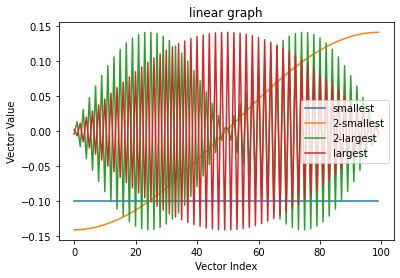

In [5]:
# code for the Laplacian matrix L of line graph
n = 100
lg_edge = range(n-1), range(1, n)
lg_L = lapl(lg_edge, n)
print(lg_L)
lg_eig_vec = sorted_eig_vec(lg_L)
lg_sm_eig_vec_plot(lg_eig_vec, "linear graph")

[[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  3. -1. ...  0.  0. -1.]
 [ 0. -1.  3. ...  0.  0. -1.]
 ...
 [ 0.  0.  0. ...  3. -1. -1.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1. -1. -1. ... -1. -1. 99.]]


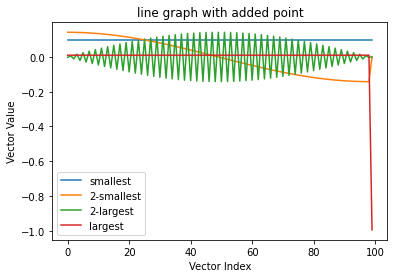

In [6]:
# code for the Laplacian matrix L of line graph with added point
n = 100
lg_ap_edge = list(range(n-2)) + list(range(n-1)), list(range(1, n-1)) + [n-1] * (n - 1)
lg_ap_L = lapl(lg_ap_edge, n)
print(lg_ap_L)
lg_ap_eig_vec = sorted_eig_vec(lg_ap_L)
lg_sm_eig_vec_plot(lg_ap_eig_vec, "line graph with added point")

[[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1.  0.  0. ...  0. -1.  2.]]


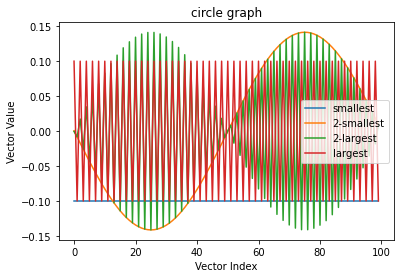

In [7]:
# code for the Laplacian matrix L of circle graph
n = 100
cg_edge = list(range(n-1)) + [0], list(range(1, n)) + [n-1]
cg_L = lapl(cg_edge, n)
print(cg_L)
cg_eig_vec = sorted_eig_vec(cg_L)
lg_sm_eig_vec_plot(cg_eig_vec, "circle graph")

[[ 3. -1.  0. ...  0. -1. -1.]
 [-1.  3. -1. ...  0.  0. -1.]
 [ 0. -1.  3. ...  0.  0. -1.]
 ...
 [ 0.  0.  0. ...  3. -1. -1.]
 [-1.  0.  0. ... -1.  3. -1.]
 [-1. -1. -1. ... -1. -1. 99.]]


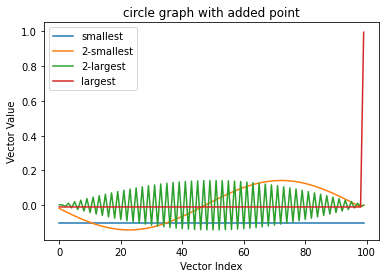

In [8]:
# code for the Laplacian matrix L of circle graph with added point
n = 100
cg_ap_edge = list(range(n-2)) + [0] + list(range(n-1)), list(range(1, n-1)) + [n-2] + [n-1] * (n - 1)
cg_ap_L = lapl(cg_ap_edge, n)
print(cg_ap_L)
cg_ap_eig_vec = sorted_eig_vec(cg_ap_L)
lg_sm_eig_vec_plot(cg_ap_eig_vec, "circle graph with added point")

#### <font color="red">Write your explanation here.</font>

The equation $v^tLv = \frac{1}{2}\sum_{(i,j) \in E}(v(i) - v(j))^2$ tells us the difference of the value of two vertices with a edge contributes to $v^tLv$. So maximizing $v^tLv$ leads to values of edge related vertices are as closed as possible, minimizing as far as possible. This is why we can see from all four plots, the points on the curve with two largest egienvalue, which maximize $v^tLv$, are $y$-axis far when they have an edge. On the contrary, edge related points are closed along the $y$-axis when they are on the curve with two smallest eigenvalue which minimize $v^tLv$. In particular, all points have the same $y$ value on the smallest curve such that $v^tLv=0$.

(b) (8 points) For each such $n$ = 100 node graph, plot the embedding of the graph onto the eigenvectors corresponding to the 2nd and 3rd smallest eigenvalues of the Laplacian. That is: if $v_2$ is the second eigenvector and $v_3$ is the third eigenvector of the Laplacian, create a scatter plot with the points $(v_2(i), v_3(i))$ for $i \in \{1, ..., 100\}$. Overlay the edges of the graph, i.e. for every pair of points $i$, $j$, that are connected in the graph $G$, draw an edge between $(v_2(i), v_3(i))$ and $(v_2(j), v_3(j))$.

In [9]:
def sm_eig_vec_plot(edge, eig_vec, title):
    v2, v3 = eig_vec[:, 1], eig_vec[:, 2]
    plt.scatter(v2, v3)
    for st_idx, ed_idx in zip(*edge):
        plt.plot([v2[st_idx], v2[ed_idx]], [v3[st_idx], v3[ed_idx]], "m")
    plt.title(title)
    plt.xlabel("2nd smallest eigen vector")
    plt.ylabel("3nd smallest eigen vector")

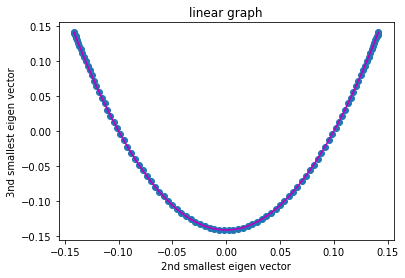

In [10]:
# code for line graph
sm_eig_vec_plot(lg_edge, lg_eig_vec, "linear graph")

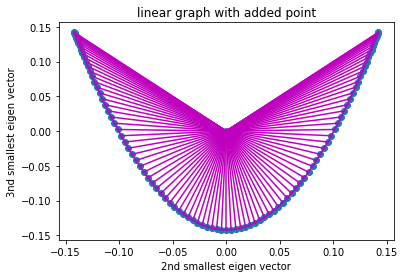

In [11]:
# code for line graph with added point
sm_eig_vec_plot(lg_ap_edge, lg_ap_eig_vec, "linear graph with added point")

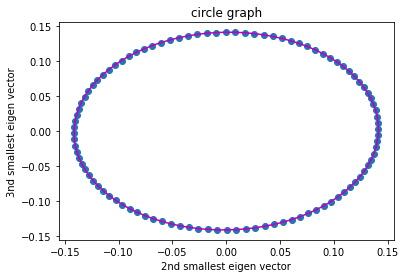

In [14]:
# code for circle graph
sm_eig_vec_plot(cg_edge, cg_eig_vec, "circle graph")

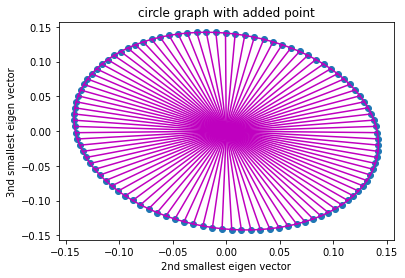

In [13]:
# code for circle graph with added point
sm_eig_vec_plot(cg_ap_edge, cg_ap_eig_vec, "circle graph with added point")

(c) (7 points) Pick 500 random points in the unit square by indepdently choosing their $x$ and $y$ coordinates uniformly at random from the interval [0, 1]. Form a graph by adding an edge between every pair of points whose Eulcidean distance is at most 1/4. Compute the eigenvectors of the Laplacian of this graph. Plot the embedding of this graph onto the second and third eigenvectors (i.e. those corresponding to the 2nd and 3rd smallest eigenvalues). Do not overlay the edges of the graph, just plot the vertices. For all points in the original graph with $x$ and $y$ coordinates both less than 1/2, plot their images in a different color. Are these points clustered together in the embedding? Why does this make sense?

Text(0, 0.5, '3nd smallest eigen vector')

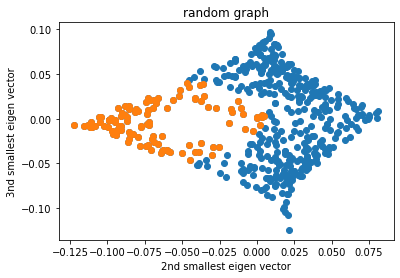

In [15]:
# code
m = 500
point = np.random.uniform(size=(m, 2))
distance = np.linalg.norm(point[None] - point[:,None], axis=-1)
rd_L = (distance < 0.25).astype(int)
assert np.allclose(rd_L, rd_L.T) # check if L is symmetric
rd_L = np.diag(np.sum(rd_L, axis=0)) - rd_L
rd_eig_vec = sorted_eig_vec(rd_L)
v2, v3 = rd_eig_vec[:, 1], rd_eig_vec[:, 2]

plt.scatter(v2, v3)
mask = (point[:, 0] < 0.5) & (point[:, 1] < 0.5)
plt.scatter(v2[mask], v3[mask])
plt.title("random graph")
plt.xlabel("2nd smallest eigen vector")
plt.ylabel("3nd smallest eigen vector")

#### <font color="red">Write your explanation here.</font>

Yes, these points clustered together in the embedding. Since these points uniformly lay on the $[0, 1/2] \times [0, 1/2]$ region in their original cooordinate, a large fraction of two points have an edge because their Eulicidean distance are less than $1/4$. As such, there are a lot of points are closed w.r.t their embeddings representing eigenvectors with the 2nd smallest and 3nd smallest eigenvalues. Therefore, these points clustered together in the embedding

### 4. Poisson Equation

(a) (17 points) Implement Poisson image editing using the finite difference method, as disscussed in the lecture. The inputs are the source image, the mask of the source image, the target image and the location in the target image. References: Poisson Image Editing (SIGGRAPH 2003), Fourier Analysis of the 2D Screened Poisson Equation for Gradient Domain Problems (ECCV 2008).
<table><tr><td><img src='bear.bmp'></td><td><img src='bearmask.bmp'></td>
<td><img src='pool.bmp'></td><td><img src='poolbear.bmp'></td></tr></table>

In [16]:
def poissonImageEditing(source, mask, target, lx, ly):
    (sh, sw, _) = source.shape
    (th, tw, _) = target.shape
    
    # construct the map to record the unknown pixels
    p2i = np.array([-1]*sw*sh).reshape(sh, sw)
    i2p = 0
    for x in range(sh):
        for y in range(sw):
            if mask[x, y, 0] == 255:
                p2i[x, y] = i2p
                i2p += 1
                
    # ▽S gradient x, gradient y
    # div(▽S) divergent of the source image
    div = np.array([-1]*sw*sh*3).reshape(sh, sw, 3)
    for x in range(sh):
        for y in range(sw):
            if p2i[x, y] > -1:
                div[x, y] = source[x-1, y] + source[x+1, y] + source[x, y-1] + source[x, y+1] - 4 * source[x, y]
    

    # construct A, b
    A = np.zeros(shape=(i2p, i2p, 3))
    b = np.zeros(shape=(i2p, 3))
    idx = 0
    for x in range(sh):
        for y in range(sw):
            if p2i[x, y] > -1:
                assert idx == p2i[x, y]
                b[idx] = 1 * div[x, y]
                A[idx][idx] = -4
                if p2i[x-1, y] == -1:
                    b[idx] -= target[lx+x-1, ly+y]
                else:
                    A[idx][p2i[x-1, y]] = 1
                if p2i[x+1, y] == -1:
                    b[idx] -= target[lx+x+1, ly+y]
                else:
                    A[idx][p2i[x+1, y]] = 1
                if p2i[x, y-1] == -1:
                    b[idx] -= target[lx+x, ly+y-1]
                else:
                    A[idx][p2i[x, y-1]] = 1
                if p2i[x, y+1] == -1:
                    b[idx] -= target[lx+x, ly+y+1]
                else:
                    A[idx][p2i[x, y+1]] = 1
                idx += 1
    assert idx == i2p
    
    # solve Ax = b using scipy.sparse.linalg.cg
    img = []
    for i in range(3): 
        a, c = scipy.sparse.linalg.cg(A[..., i], b[:, i])
        img.append(scipy.sparse.linalg.cg(A[..., i], b[:, i])[0])
    img = np.stack(img, -1)
    img = np.clip(img, 0, 255)
    
    
    # return the fused image
    import copy
    fu_img = copy.deepcopy(target)
    for x in range(sh):
        for y in range(sw):
            if p2i[x, y] > -1:
                fu_img[lx+x, ly+y] = img[p2i[x, y]]
    return fu_img
    

Test your implementation using bear.bmp, bearmask.bmp and pool.bmp.

In [17]:
source = plt.imread("./bear.bmp").astype(float)
mask = plt.imread("./bearmask.bmp").astype(float)
target = plt.imread("./pool.bmp").astype(float)
lx = 200
ly = 40
fussion = poissonImageEditing(source, mask, target, lx, ly)

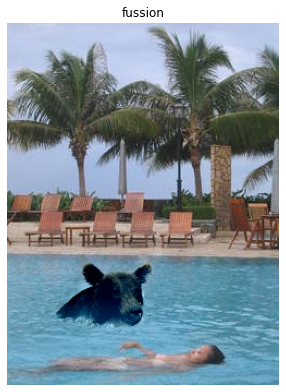

In [19]:
def display_actual_size(img, title):
    h, w, _ = img.shape
    figsize = w / 50, h / 50 
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.title(title)
    plt.imshow(img.astype(np.uint8))
    
display_actual_size(fussion, "fussion")

Test your implementation using your own example.

<table><tr><td><img src='test_src.jpeg'></td><td><img src='test_mask.jpeg'></td>
<td><img src='test_target.jpeg'></td><td><img src='poolbear.bmp'></td></tr></table>

In [20]:
source = plt.imread("./test_src.jpeg").astype(float)
mask = plt.imread("./test_mask.jpeg").astype(float)
target = plt.imread("./test_target.jpeg").astype(float)
lx = 200
ly = 100

fussion = poissonImageEditing(source, mask, target, lx, ly)

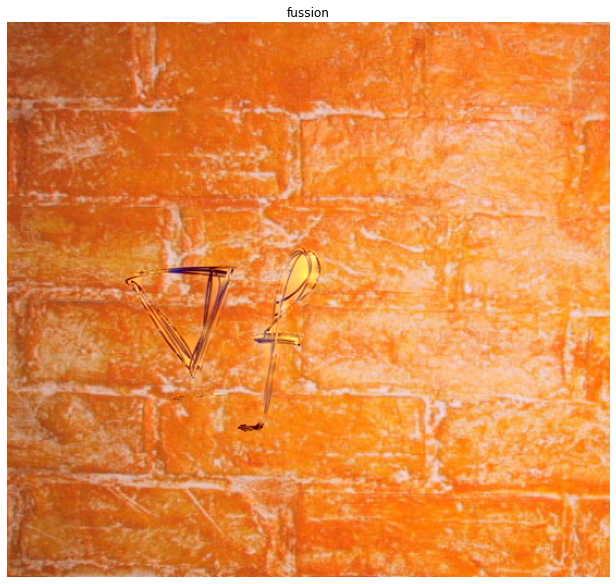

In [21]:
display_actual_size(fussion, "fussion")

(b) (8 points) Suppose the Laplace equation $\nabla^2f=0$ is on the unit disc $D = \{(x, y) | x^2 + y^2 \leq 1\}$ under the Dirichlet boundary conditions $f(x, y) = g(x, y)$ for all $(x, y)$ with $x^2 + y^2 = 1$, where $g(x,y)$ is given as input.

Propose a way to discretize and solve this equation on $D$ by changing the discretization of $\nabla^2f$ and/or working out reasonable boundary conditions on the grid.

#### <font color="red">Write your answer here.</font>

- <font color="green">Equivalent change</font>: letting $x = r\cos\theta, y=r\sin\theta$, and $u(r, \theta) = f(r \cos\theta, r \sin\theta), r \in [0, 1], \theta \in [0, 2\pi]$, then $\nabla^2f = u_{rr} + \frac{1}{r} u_r + \frac{1}{r^2} u_{\theta \theta} = 0$ and $u(1, \theta) = f(\sin\theta, \cos\theta) = g(\sin\theta, \cos\theta), u(r, 0) = f(r, 0) = u(r, 2\pi)$, so we change $xy$ region $D=\{(x,y)|x^2 + y^2 \leq 1\}$ to $r\theta$ region $D^{\prime}=\{(r,\theta)|0 \leq r \leq 1, 0 \leq \theta \leq 2\pi \}$

- <font color="green">$r\theta$ region discretization</font>: divide $r\theta$ region $D^{\prime}$ into a $r\theta$ grid with $M \times N$ lattices of same size $\delta_r = \frac{1}{M}, \delta_\theta = \frac{2\pi}{N}$, where $M > 2, N > 2$ are given integers, so we discrete the region $D^{\prime}$ to $E=\{(r_m,\theta_n)|r_m=m\delta_r, \theta_n=n\delta_\theta, m=0,1,2,...,M, n=0,1,2,...,N \}$, and we need to solve $u^{m, n} = u(r_m, \theta_n)$ (so we can obtain $f(r_m \cos(\theta_n), r_m \sin(\theta_n))$) where $(r_m, \theta_n) \in E$

- <font color="green">Equation and solution</font>:
  - By the Laplace equation $\nabla^2f = u_{rr} + \frac{1}{r} u_r + \frac{1}{r^2} u_{\theta \theta} = 0$, we use the finite difference method to approximate the equation, we can get
$\frac{1}{\delta_r^2}(u^{m-1,n} - 2u^{m,n} + u^{m+1,n}) + \frac{M}{2m\delta_r}(u^{m+1,n}-u^{m-1,n}) + \frac{M^2}{m^2\delta_\theta^2}(u^{m,n-1}-2u^{m,n}+u^{m,n+1})=0$ for $m=1,2,...,M-1, n=1,2,...,N-1$
, namely 
$$(\frac{1}{\delta_r^2} - \frac{M}{2m\delta_r})u^{m-1,n} + (\frac{1}{\delta_r^2} + \frac{M}{2m\delta_r})u^{m+1,n} + \frac{M^2}{m^2\delta_\theta^2}u^{m,n-1} + \frac{M^2}{m^2\delta_\theta^2}u^{m,n+1} - 2(\frac{1}{\delta_r^2} + \frac{M^2}{m^2\delta_\theta^2})u^{m,n}, m=1,2,...,M-1, n=1,2,...,N-1 \qquad \qquad \mbox{a})$$
  - By the boundary condition $u(1, \theta) = g(\sin\theta, \cos\theta)$, we can get $$u^{M,n}=g(\sin(n\delta_\theta), \cos(n\delta_\theta)), n=0,1,2...,N \qquad \qquad \mbox{b})$$ 
  - By the extra bounday condition $u(r,0)=u(r,2\pi)$ 
$$u^{m,0}=u^{m,N}, m=0,1,2...,M \qquad \qquad \mbox{c})$$
  - By solving the linear equations a), b), c), we get the $u^{m,n}$